## FDMS TME2
Florian Toque & Paul Willot


In [1]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn.datasets import fetch_mldata
from sklearn import cross_validation
from sklearn import base
#mnist = fetch_mldata('iris')

import matplotlib.pyplot as plt


In [191]:
ds = sklearn.datasets.make_classification(n_samples=1000,
                                          n_features=20,
                                          n_informative=10,
                                          n_redundant=5,
                                          n_repeated=2,
                                          n_classes=2,
                                          n_clusters_per_class=2,
                                          weights=None,
                                          flip_y=0.01,
                                          class_sep=1.0,
                                          hypercube=True,
                                          shift=0.0,
                                          scale=1.0,
                                          shuffle=True,
                                          random_state=None)
X= ds[0]
y= ds[1]

In [91]:
mnist = fetch_mldata('iris')

X= mnist.data
y= mnist.target

for idx,i in enumerate(y):
    if (i==2) or (i==3):
        y[idx]=-1

In [192]:
# labels: [0,1] -> [-1,1]
for idx,i in enumerate(y):
    if (i==0):
        y[idx]=-1

print(X[0])
print(y[0])

[-0.30134275  4.48965222 -0.45212721  2.86652643  1.08376722  3.12443608
  1.48065915 -1.1379765   0.92573125  0.69962513  2.80682152  1.46842328
 -3.37984414 -3.37984414  1.84762307  0.36497919  1.99927759 -0.63767391
  2.80682152  2.09540991]
-1


In [193]:
class SimpleGradientDescent:
    def __init__(self,theta,eps=0.01):
        self.theta=theta
        self.eps=eps
        
    def fit(self,X,y,nbIt=10000,printevery=1000):
        l=len(X)
        xTrans = X.transpose()
        for i in xrange(0,nbIt):
            hypothesis = np.dot(X, self.theta)
            loss = hypothesis - y
            cost = np.sum(loss ** 2) / (2 * l)
            if i%printevery==0:
                print("Iteration %s | Cost: %f" % (str(i).ljust(6), cost))
            gradient = np.dot(xTrans, loss) / l
            self.theta = self.theta - self.eps * gradient
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        return 1 if np.dot(x,self.theta)>0 else -1
    def score(self,X,y):
        cpt=0.0
        for idx,i in enumerate(X):
            cpt += 1 if self.predict(i)==y[idx] else 0
        print(cpt,len(X))
        return cpt/len(X)

---
### L1

In [226]:
class GradientDescent(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        self.theta=theta
        self.eps=eps
        self.lamb=lamb

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            #cost = np.sum(loss ** 2) / (2 * l) + (self.lamb*np.linalg.norm(self.theta))
            
            
            cost = np.sum(loss ** 2) * (1 / l) + (self.lamb*np.linalg.norm(self.theta))
            gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))+np.sign(theta)*self.lamb
            thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(theta)):
                theta[k] = 0 if thetaprime[k]*theta[k]<0 else thetaprime[k]

            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f | Score: %.03f" % (str(i).ljust(6), cost,self.score(X,y)))
                    print("%d features used"%(self.nb_used_features()))
                
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        #print(cpt,len(X))
        return cpt/len(X)
    
    def nb_used_features(self):
        cpt=len(self.theta)
        for ii in self.theta:
            if ii==0:
                cpt-=1
        return cpt

In [247]:
#theta = np.zeros(len(X[0]))
theta = X[1]
lamb=400
eps=0.00001

#gd = SimpleGradientDescent(theta,eps)
gd = GradientDescent(theta,lamb,eps)

In [248]:
nbIterations = 100000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)

Iteration 0      | Cost: 28.995022 | Score: 0.703
12 features used
Iteration 10000  | Cost: 28.168047 | Score: 0.709
16 features used
Iteration 20000  | Cost: 28.293302 | Score: 0.705
16 features used
Iteration 30000  | Cost: 28.140175 | Score: 0.698
13 features used
Iteration 40000  | Cost: 28.195999 | Score: 0.711
16 features used
Iteration 50000  | Cost: 28.316028 | Score: 0.704
16 features used
Iteration 60000  | Cost: 28.128271 | Score: 0.700
13 features used
Iteration 70000  | Cost: 28.164374 | Score: 0.709
16 features used
Iteration 80000  | Cost: 28.323631 | Score: 0.705
15 features used
Iteration 90000  | Cost: 28.163377 | Score: 0.701
13 features used


In [246]:
gd.score(X,y)

0.703

In [11]:
scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scoresSvm,np.mean(scoresSvm)))

Cross validation scores: [ 0.8   0.85  0.85  0.9   0.8 ], mean: 0.84


In [279]:
eps=0.00001
la = []
cross_sc = []
used_features = []

for lamb in np.arange(0,1000,50):
    theta = np.zeros(len(X[0]))
    gd = GradientDescent(theta,lamb,eps)
    nbIterations = 5000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %.02f | Cross val mean: %.02f | Features: %d"%(lamb,np.mean(scoresSvm),gd.nb_used_features()))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)
    used_features.append(gd.nb_used_features())

Lamda: 0.00 | Cross val mean: 0.74 | Features: 20
Lamda: 50.00 | Cross val mean: 0.74 | Features: 16
Lamda: 100.00 | Cross val mean: 0.75 | Features: 14
Lamda: 150.00 | Cross val mean: 0.74 | Features: 13
Lamda: 200.00 | Cross val mean: 0.74 | Features: 11
Lamda: 250.00 | Cross val mean: 0.73 | Features: 12
Lamda: 300.00 | Cross val mean: 0.71 | Features: 13
Lamda: 350.00 | Cross val mean: 0.70 | Features: 10
Lamda: 400.00 | Cross val mean: 0.70 | Features: 8
Lamda: 450.00 | Cross val mean: 0.71 | Features: 10
Lamda: 500.00 | Cross val mean: 0.70 | Features: 12
Lamda: 550.00 | Cross val mean: 0.71 | Features: 13
Lamda: 600.00 | Cross val mean: 0.71 | Features: 9
Lamda: 650.00 | Cross val mean: 0.71 | Features: 9
Lamda: 700.00 | Cross val mean: 0.70 | Features: 10
Lamda: 750.00 | Cross val mean: 0.70 | Features: 7
Lamda: 800.00 | Cross val mean: 0.69 | Features: 6
Lamda: 850.00 | Cross val mean: 0.70 | Features: 4
Lamda: 900.00 | Cross val mean: 0.70 | Features: 5
Lamda: 950.00 | Cross 

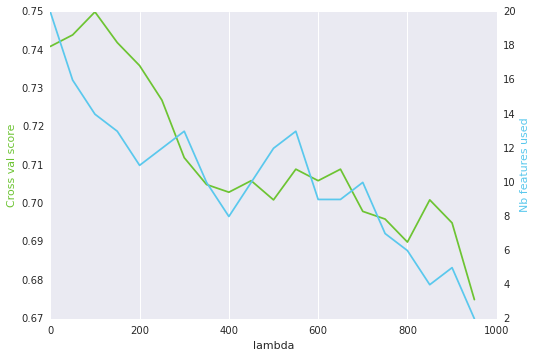

In [280]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(la, cross_sc, '#6DC433')
ax2.plot(la, used_features, '#5AC8ED')

ax1.set_xlabel('lambda')
ax1.set_ylabel('Cross val score', color='#6DC433')
ax2.set_ylabel('Nb features used', color='#5AC8ED')

ax1.yaxis.grid(False)
ax2.grid(False)
plt.show()

---
### L2

In [12]:
class GradientDescentL2(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        self.theta=theta
        self.eps=eps
        self.lamb=lamb

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            cost = np.sum(loss ** 2) / (2 * l) + (self.lamb*(np.linalg.norm(-self.theta)**2))
            gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))+np.sign(theta)*self.lamb
            thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(theta)):
                theta[k] = 0 if thetaprime[k]*theta[k]<0 else thetaprime[k]

            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f" % (str(i).ljust(6), cost))
                
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        print(cpt,len(X))
        return cpt/len(X)

In [13]:
theta = np.zeros(len(X[0]))
lamb=0.05
eps=0.00001
gd = GradientDescentL2(theta,lamb,eps)

nbIterations = 20000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)

print("Score: %s"%gd.score(X,y))

scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scoresSvm,np.mean(scoresSvm)))

Iteration 0      | Cost: 0.500000
Iteration 2000   | Cost: 0.190335
Iteration 4000   | Cost: 0.189843
Iteration 6000   | Cost: 0.190266
Iteration 8000   | Cost: 0.190468
Iteration 10000  | Cost: 0.190555
Iteration 12000  | Cost: 0.190593
Iteration 14000  | Cost: 0.190609
Iteration 16000  | Cost: 0.190617
Iteration 18000  | Cost: 0.190620
(93.0, 100)
Score: 0.93
Cross validation scores: [ 1.    0.85  0.95  0.9   0.95], mean: 0.93


In [14]:
eps=0.00001
la = []
cross_sc = []

for lamb in np.arange(0,12,0.5):
    theta = np.zeros(len(X[0]))
    gd = GradientDescentL2(theta,lamb,eps)
    nbIterations = 5000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %.02f, Cross val mean: %.02f"%(lamb,np.mean(scoresSvm)))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)

Lamda: 0.00, Cross val mean: 0.93
Lamda: 0.50, Cross val mean: 0.93
Lamda: 1.00, Cross val mean: 0.92
Lamda: 1.50, Cross val mean: 0.91
Lamda: 2.00, Cross val mean: 0.90
Lamda: 2.50, Cross val mean: 0.89
Lamda: 3.00, Cross val mean: 0.89
Lamda: 3.50, Cross val mean: 0.89
Lamda: 4.00, Cross val mean: 0.89
Lamda: 4.50, Cross val mean: 0.89
Lamda: 5.00, Cross val mean: 0.88
Lamda: 5.50, Cross val mean: 0.88
Lamda: 6.00, Cross val mean: 0.87
Lamda: 6.50, Cross val mean: 0.86
Lamda: 7.00, Cross val mean: 0.85
Lamda: 7.50, Cross val mean: 0.85
Lamda: 8.00, Cross val mean: 0.86
Lamda: 8.50, Cross val mean: 0.86
Lamda: 9.00, Cross val mean: 0.86
Lamda: 9.50, Cross val mean: 0.86
Lamda: 10.00, Cross val mean: 0.86
Lamda: 10.50, Cross val mean: 0.86
Lamda: 11.00, Cross val mean: 0.85
Lamda: 11.50, Cross val mean: 0.85


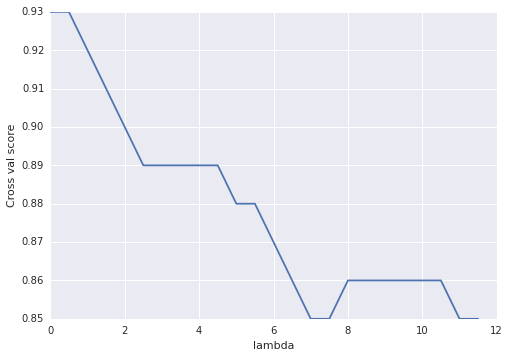

In [15]:
import matplotlib.pyplot as plt
plt.plot(la,cross_sc)
plt.ylabel('Cross val score')
plt.xlabel('lambda')
plt.show()